In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/macrodata.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


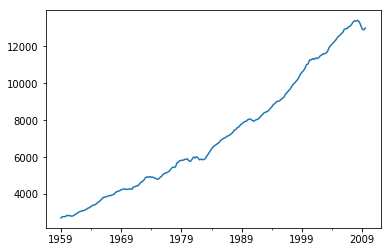

In [4]:
df['realgdp'].plot.line()

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [11]:
df['trend'] = gdp_trend

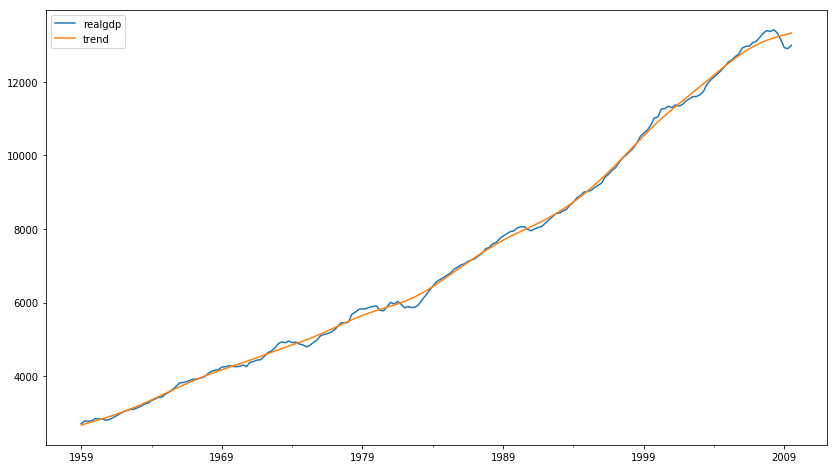

In [14]:
df[['realgdp','trend']].plot.line(figsize=(14,8))

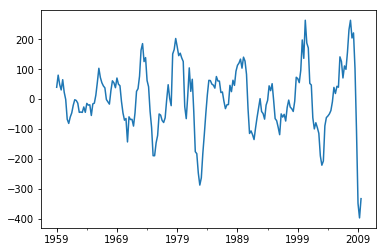

In [10]:
gdp_cycle.plot.line()

### ETS decomposition

In [15]:
airline = pd.read_csv('_sources/TSA_COURSE_NOTEBOOKS/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [16]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
airline = airline.dropna()

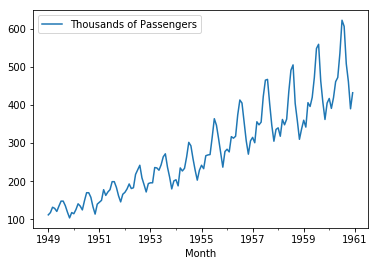

In [18]:
airline.plot.line()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

In [23]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
1950-01-01    0.910230
1950-02-01    0.883625
1950-03-01    1.007366
1950-04-01    0.975906
1950-05-01    0.981378
1950-06-01    1.112776
1950-07-01    1.226556
1950-08-01    1.219911
1950-09-01    1.060492
1950-10-01    0.921757
1950-11-01    0.801178
1950-12-01    0.898824
1951-01-01    0.910230
1951-02-01    0.883625
1951-03-01    1.007366
1951-04-01    0.975906
1951-05-01    0.981378
1951-06-01    1.112776
                ...   
1958-07-01    1.226556
1958-08-01    1.219911
1958-09-01    1.060492
1958-10-01    0.921757
1958-11-01    0.801178
1958-12-01    0.898824
1959-01-01    0.910230
1959-02-01    0.883625
1959-03-01    1.007366
1959-04-01    0.975906
1959-05-01    0.981378
1959-06-01    1.112776
1959-

In [24]:
result.resid

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
1950-04-01    1.014048
1950-05-01    0.926903
1950-06-01    0.965041
1950-07-01    0.983557
1950-08-01    0.973372
1950-09-01    1.022505
1950-10-01    0.972193
1950-11-01    0.938953
1950-12-01    1.006791
1951-01-01    1.013845
1951-02-01    1.064018
1951-03-01    1.091854
1951-04-01    1.017665
1951-05-01    1.051583
1951-06-01    0.946044
                ...   
1958-07-01    1.048384
1958-08-01    1.078970
1958-09-01    0.985654
1958-10-01    0.997797
1958-11-01    0.980294
1958-12-01    0.940569
1959-01-01    0.982518
1959-02-01    0.950574
1959-03-01    0.978528
1959-04-01    0.974644
1959-05-01    1.017764
1959-06-01    0.996861
1959-

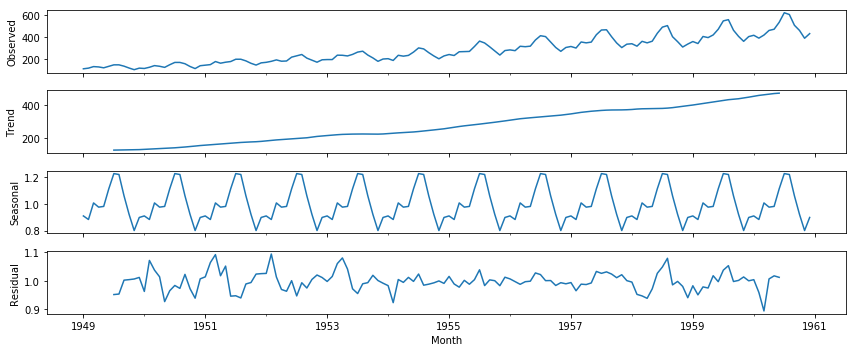

In [36]:
result.plot();

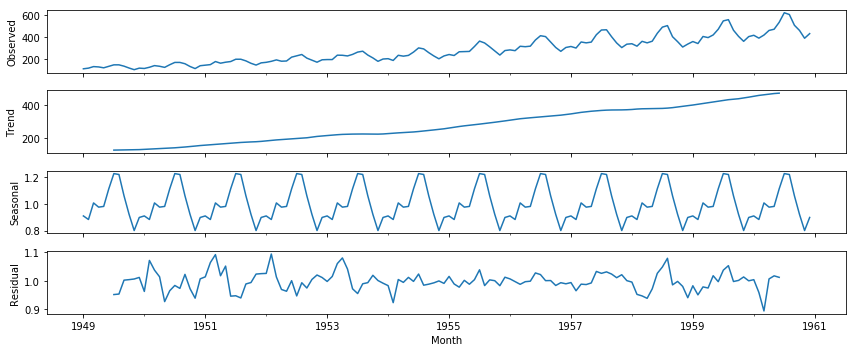

In [33]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

result.plot();

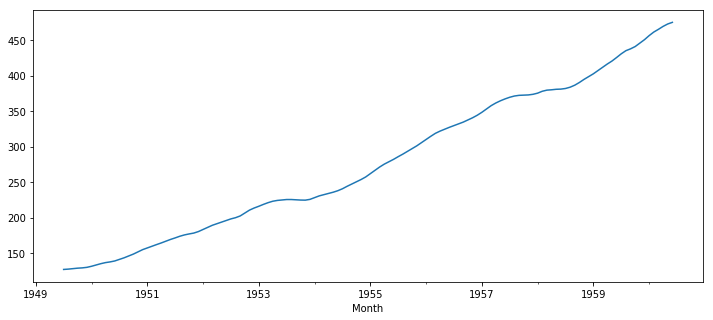

In [37]:
result.trend.plot()